# GMSH + argiope demo

In [215]:
import numpy as np
import matplotlib.pyplot as plt
import argiope as ag
import matplotlib as mpl
%matplotlib nbagg


In [250]:
%%file demo.geo
lx = 1.;
ly = 1.;
lz = 1.;
lc = 1.;

Nx = 32 + 1;
Ny = 32 + 1;
Nz = 32 + 1;

qx = 1.1;
qy = 1.1;

Point(1) = {0.,  0., 0., lc};
Point(2) = {lx,  0., 0., lc};
Point(3) = {lx,  ly, 0., lc};
Point(4) = {0.,  ly, 0., lc};

Line(1)  = {1,2};
Line(2)  = {2,3};
Line(3)  = {3,4};
Line(4)  = {4,1};

Transfinite Line {1,3} = Nx Using Progression qx;
Transfinite Line {-2,-4} = Ny Using Progression qy;;

Line Loop(1) = {1,2,3,4};
Plane Surface(1) = {1};
Transfinite Surface {1};
Recombine Surface {1};
Physical Surface("CORE") = {1};

Overwriting demo.geo


In [251]:
!gedit demo.geo
#!file -bi demo.geo

In [252]:
!gmsh -2 demo.geo
mesh = ag.mesh.read_msh("demo.msh")

Info    : Running 'gmsh -2 demo.geo' [Gmsh 2.10.1, 1 node, max. 1 thread]
Info    : Started on Sat Apr 15 16:03:09 2017
Info    : Reading 'demo.geo'...
Error   : 'demo.geo', line 24 : syntax error (;)
Info    : Done reading 'demo.geo'
Info    : Meshing 1D...
Info    : Meshing curve 1 (Line)
Info    : Meshing curve 2 (Line)
Info    : Meshing curve 3 (Line)
Info    : Meshing curve 4 (Line)
Info    : Done meshing 1D (0.004 s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (transfinite)
Info    : Done meshing 2D (0.000317097 s)
Info    : 1089 vertices 1156 elements
Info    : Writing 'demo.msh'...
Info    : Done writing 'demo.msh'
Info    : Stopped on Sat Apr 15 16:03:09 2017


In [253]:
stats = mesh.stats()
stats

/home/lcharleux/Documents/Informatique/anaconda/lib/python3.5/site-packages/ipykernel/zmqshell.py:501: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


volume  centroid                      stats             \
                          x         y    z   max_angle  min_angle   
element                                                             
1        0.000095  0.005007  0.002992  0.0  147.869223  30.237348   
2        0.000194  0.008938  0.008243  0.0  145.082411  34.531622   
3        0.000303  0.012617  0.014113  0.0  140.482155  39.361308   
4        0.000423  0.015986  0.020569  0.0  135.493310  44.428973   
5        0.000555  0.019059  0.027651  0.0  130.438198  49.521275   
6        0.000700  0.021858  0.035417  0.0  125.528135  54.452503   
7        0.000859  0.024404  0.043935  0.0  120.920637  59.073767   
8        0.001035  0.026721  0.053281  0.0  116.720038  63.284318   
9        0.001228  0.028828  0.063540  0.0  112.979268  67.032945   
10       0.001440  0.030744  0.074804  0.0  109.708662  70.310228   
11       0.001674  0.032486  0.087175  0.0  106.888423  73.136497   
12       0.001931  0.034070  0.100766  0.0  104.480722  75.549914   
13       0.002214  0.035510  0.115700  0.0  102.439261  77.597002   
14       0.002525  0.036820  0.132113  0.0  100.715785  79.326177   
15       0.002867  0.038011  0.150154  0.0   99.264003  80.783859   
16       0.003244  0.039093  0.169987  0.0   98.041619  82.012444   
17       0.003658  0.040077  0.191793  0.0   97.011158  83.049503   
18       0.004113  0.040972  0.215768  0.0   96.140055  83.927681   
19       0.004614  0.041785  0.242133  0.0   95.400374  84.675001   
20       0.005165  0.042525  0.271125  0.0   94.768335  85.315323   
21       0.005771  0.043197  0.303009  0.0   94.223787  85.868883   
22       0.006438  0.043808  0.338074  0.0   93.749688  86.352815   
23       0.007171  0.044364  0.376640  0.0   93.331620  86.781632   
24       0.007978  0.044869  0.419056  0.0   92.957356  87.167661   
25       0.008866  0.045329  0.465709  0.0   92.616489  87.521421   
26       0.009842  0.045746  0.517023  0.0   92.300100  87.851950   
27       0.010916  0.046126  0.573463  0.0   92.000488  88.167080   
28       0.012097  0.046471  0.635544  0.0   91.710929  88.473678   
29       0.013396  0.046784  0.703829  0.0   91.425477  88.777844   
30       0.014826  0.047070  0.778939  0.0   91.138796  89.085084   
...           ...       ...       ...  ...         ...        ...   
995      0.011225  0.963024  0.211250  0.0  113.670403  71.994901   
996      0.009235  0.966426  0.283384  0.0  119.995396  65.660489   
997      0.007597  0.969517  0.349032  0.0  126.193120  59.451409   
998      0.006247  0.972325  0.408789  0.0  132.100021  53.530827   
999      0.005136  0.974877  0.463197  0.0  137.592880  47.916444   
1000     0.004221  0.977194  0.512750  0.0  142.597322  42.426915   
1001     0.003469  0.979298  0.557896  0.0  147.084233  37.426445   
1002     0.002850  0.981208  0.599043  0.0  151.059141  32.944257   
1003     0.002342  0.982942  0.636562  0.0  154.549957  28.974946   
1004     0.001925  0.984514  0.670792  0.0  157.596411  25.490734   
1005     0.001582  0.985939  0.702038  0.0  160.242417  22.452030   
1006     0.001301  0.987230  0.730581  0.0  162.531207  19.815064   
1007     0.001071  0.988398  0.756674  0.0  164.502608  17.536740   
1008     0.000882  0.989453  0.780548  0.0  166.191739  15.577346   
1009     0.000728  0.990405  0.802413  0.0  167.628555  13.901844   
1010     0.000602  0.991262  0.822459  0.0  168.837858  12.480294   
1011     0.000499  0.992033  0.840861  0.0  169.839470  11.287832   
1012     0.000416  0.992723  0.857777  0.0  170.648403  10.304452   
1013     0.000348  0.993340  0.873357  0.0  171.274845   9.514818   
1014     0.000293  0.993889  0.887738  0.0  171.723767   8.908257   
1015     0.000248  0.994378  0.901053  0.0  171.993825   8.479143   
1016     0.000212  0.994811  0.913431  0.0  172.074974   8.228010   
1017     0.000183  0.995195  0.925003  0.0  171.943546   8.163989   
1018     0.000160  0.995536  0.935902  0.0  171.551996   8.309796   
1019     

<IPython.core.display.Javascript object>


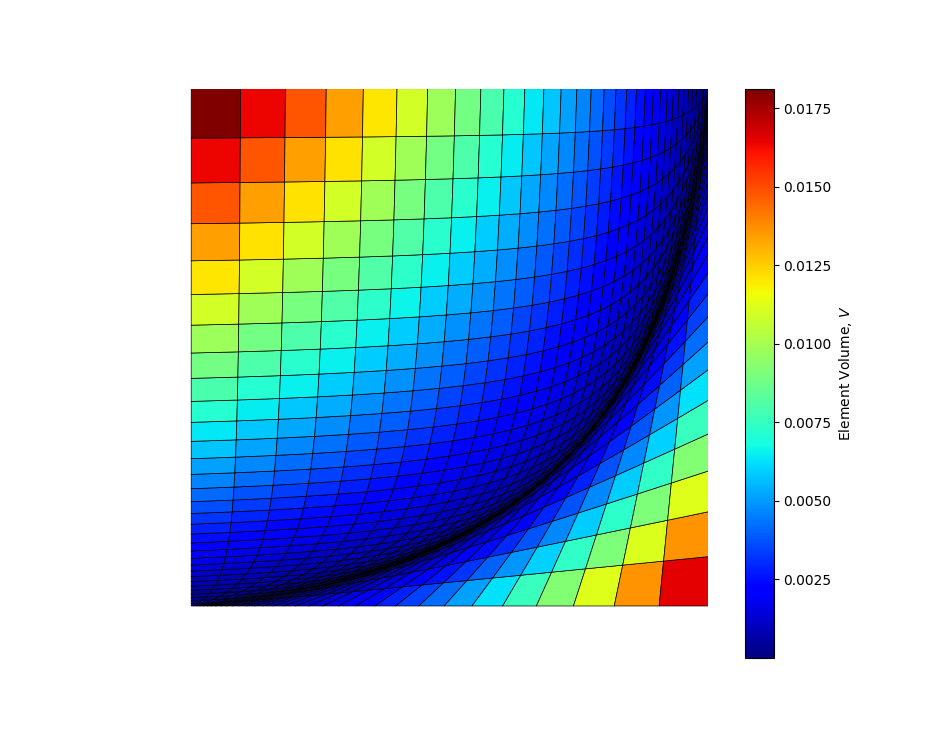

In [254]:
field = stats.volume
patches = mesh.to_polycollection(edgecolor = "black", linewidth = .5)
patches.set_array( field )
patches.set_cmap(mpl.cm.jet)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect("equal")
ax.set_xlim(-.1, 1.)
ax.set_ylim(-.1, 1.)
ax.add_collection(patches)
cbar = plt.colorbar(patches)
cbar.set_label("Element Volume, $V$ ")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.axis('off')
plt.grid()
plt.show()